In [1]:
# this is a exploratory data analysis were we tried to derive meaningful information from the dataset 


In [2]:
# importing the libraries  

import pandas as pd 
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import ast 
import mpld3
mpld3.enable_notebook

<function mpld3._display.enable_notebook(local=False, **kwargs)>

In [3]:
# loading the data
df_meta=pd.read_csv("movies_metadata.csv",low_memory=False)

In [4]:
df_meta.head(5).transpose()

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [5]:
# this dataframe has 45466 rows and 24 colums
df_meta.shape

(45466, 24)

In [6]:
# information about the datatypes of various columns and how many non null entries are there for each column 

df_meta.info()

# we can see that in the columns -"belongs_to_collection" , "homepage" and "tagline" there are many NaN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [7]:
# in the next step we attempt to clean the data and make it suitable for us to perform operations on the dataset

In [8]:
# there are many movies where the original title is not the same as title
# the original title refers to the title in the native language whereas the title is the english version of the same 
# for our analysis we will be using the title in english so we can safely drop the "original title column"

df_meta[df_meta["original_title"]!=df_meta["title"]]


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
28,False,NaN,18000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 878, 'n...",NaN,902,tt0112682,fr,La Cité des Enfants Perdus,A scientist in a surrealist society kidnaps ch...,...,1995-05-16,1738611.0,108.0,"[{'iso_639_1': 'cn', 'name': '广州话 / 廣州話'}, {'i...",Released,Where happily ever after is just a dream.,The City of Lost Children,False,7.6,308.0
29,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,37557,tt0115012,zh,摇啊摇，摇到外婆桥,A provincial boy related to a Shanghai crime f...,...,1995-04-30,0.0,108.0,"[{'iso_639_1': 'zh', 'name': '普通话'}]",Released,In 1930's Shanghai violence was not the proble...,Shanghai Triad,False,6.5,17.0
32,False,NaN,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 12, ...",NaN,78802,tt0114952,fr,"Guillaumet, les ailes du courage",NaN,...,1996-09-18,0.0,50.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Wings of Courage,False,6.8,4.0
57,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,11010,tt0110877,it,Il postino,Simple Italian postman learns to love poetry w...,...,1994-09-22,0.0,108.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}, {'is...",Released,NaN,The Postman,False,7.6,181.0
58,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",NaN,99040,tt0112714,fr,Le confessionnal,"The year is 1952, in Quebec City. Rachel (16),...",...,1995-09-29,0.0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,The Confessional,False,6.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45453,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,404604,tt5690142,hi,Maa,The bliss of a biology teacher’s family life i...,...,2017-07-07,0.0,146.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,Mom,False,6.6,14.0
45455,False,NaN,0,[],NaN,67179,tt0069215,it,San Michele aveva un gallo,Sentenced to life imprisonment for illegal act...,...,1972-01-01,0.0,90.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,St. Michael Had a Rooster,False,6.0,3.0
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0


In [9]:
df_meta.drop(columns="original_title",inplace=True)

In [10]:
# here we see that most of the movies have revenue as 0 amost 38000 movies have revenue as 0
df_meta[df_meta["revenue"]==0].shape

(38052, 23)

In [11]:
# we replace the 0 values with NaN values for the revenue column
df_meta["revenue"]=df_meta["revenue"].replace(0.0,np.nan)

In [12]:
# we check the datatype of the entries in the revenue column
df_meta["revenue"]

0        373554033.0
1        262797249.0
2                NaN
3         81452156.0
4         76578911.0
            ...     
45461            NaN
45462            NaN
45463            NaN
45464            NaN
45465            NaN
Name: revenue, Length: 45466, dtype: float64

In [13]:
# but for the budget colum we see the datatype to be a Object 
# so we need to convert it to a number(int/float) to perform operations on it
df_meta["budget"].dtypes

dtype('O')

In [14]:
# isnumeric() returns a boolean value to check if the expression can be evaluated as a number 
a="0"
type(a)
a.isnumeric()

True

In [15]:
# using the "for loop" we checked if there are any expressions which are not numeric and got the index of those rows
cter=0
for i in df_meta["budget"]:
    if i.isnumeric():
        cter=cter+1
    else:
        print(cter)
        cter=cter+1

19730
29503
35587


In [16]:
print(df_meta["budget"][19730])
print(df_meta["budget"][29503])
print(df_meta["budget"][35587])


/ff9qCepilowshEtG2GYWwzt2bs4.jpg
/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg
/zaSf5OG7V8X8gqFvly88zDdRm46.jpg


In [17]:
df_meta.index[19730]

19730

In [18]:
### we can drop the above rows from the data set and then apply the "con_to_nan" function so that we can set all the 0 values 
# to NaN values

In [19]:
# we can drorp these values using - df_meta.drop(df_meta.index[19730],df_meta.index[29503],df_meta.index[35587])
# then can we can apply the con_to_nan function 
def con_to_nan(x):
    if x==0:
        return np.nan
    else:
        return x 
    
df_meta["budget"]=df_meta["budget"].apply(con_to_nan)

In [20]:
# to converrt budget to numeric values we can also do it in a single step 
# "coerce" helps to set invalid parsing as NaN 
df_meta["budget"]=pd.to_numeric(df_meta["budget"],errors="coerce")


In [21]:
# the 0 vallues have been converted to NaN
df_meta["budget"].head()

0    30000000.0
1    65000000.0
2           0.0
3    16000000.0
4           0.0
Name: budget, dtype: float64

In [22]:
# we add a "times_return" column to calculate the revenue to budget ratio
df_meta["times_return"]=(df_meta["revenue"]/df_meta["budget"])

In [23]:
df_meta["times_return"]

0        12.451801
1         4.043035
2              NaN
3         5.090760
4              inf
           ...    
45461          NaN
45462          NaN
45463          NaN
45464          NaN
45465          NaN
Name: times_return, Length: 45466, dtype: float64

In [24]:
df_meta.head().transpose()

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000.0,65000000.0,0.0,16000000.0,0.0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...
popularity,21.946943,17.015539,11.7129,3.859495,8.387519


In [25]:

############################################################################################ PRODUCTION COUNTRIES ##############
#to find out which are the countries where the highest number of movies are produced 


In [26]:
# to see what an entry looks like in the dataset
test_lis=df_meta["production_countries"][23401]

In [27]:
# relpacing the NaN values using "[]" so that we can apply the ast.literal eval function
df_meta["production_countries"]=df_meta["production_countries"].replace(np.nan,"[]")

In [28]:
df_meta[df_meta["production_countries"].isna()==True]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,overview,popularity,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,times_return


In [29]:
# isinstance method returns a boolean value 
isinstance(df_meta["production_countries"][0],list)

False

In [30]:
df_meta["production_countries"]=df_meta['production_countries'].apply(ast.literal_eval)

In [31]:
# this con to list function helps extract the names of countries of movies where they were produced
# we get all the countries and make a new colum out of it called as "only_prod_country9"
def con_to_lis(x):
    if isinstance(x,list)==True:
        return [i["name"] for i in x]
    else:
        return []
        
df_meta["only_prod_country"]=df_meta["production_countries"].apply(con_to_lis)


In [32]:
isinstance(df_meta["production_countries"][123],list)

True

In [33]:
df_meta["only_prod_country"].head()

0    [United States of America]
1    [United States of America]
2    [United States of America]
3    [United States of America]
4    [United States of America]
Name: only_prod_country, dtype: object

In [34]:
# "all_country_counts" is a dictionary that keeps a count of how many times a country has appeared in the dataset 
all_country_counts={}

def country_counter(x):
    for i in x:
        if i not in all_country_counts:
            all_country_counts[i]=1
        elif i in all_country_counts:
            all_country_counts[i]=all_country_counts[i]+1

    

In [35]:
df_meta["only_prod_country"].apply(country_counter)

0        None
1        None
2        None
3        None
4        None
         ... 
45461    None
45462    None
45463    None
45464    None
45465    None
Name: only_prod_country, Length: 45466, dtype: object

In [36]:
# we are creating a new dataframe called "countries" where we have the countries and their counts
countries=pd.DataFrame.from_dict(all_country_counts.items())

In [37]:
countries.rename(columns={0:"country_name",1:"number_of_movies"},inplace=True)

In [38]:
# sorting the "countries" dataframe by the count in decending order
countries=countries.sort_values(by=["number_of_movies"],ascending=False)

# these are the top 10 countries in the "countries" dataframe
t10_countries=countries.head(10)

<AxesSubplot:xlabel='country_name', ylabel='number_of_movies'>

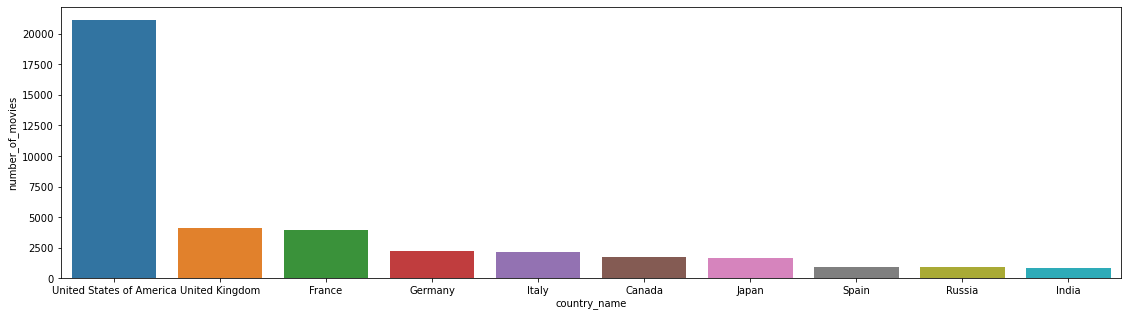

In [39]:
# plotting the "t10_countries"
fig_dims=(19,5)
fig,ax=plt.subplots(figsize=fig_dims)
sns.barplot(data=t10_countries,x=t10_countries["country_name"],y=t10_countries["number_of_movies"])

In [40]:
################### we can also draw a world map regarding were all the movies are produced #####################


In [41]:

############################################################################################ FRANCHISE MOVIES ##################

In [42]:
# selecting all the rows where the franchise is not null and making a new dataframe called "franchise"
franchise=df_meta[df_meta["belongs_to_collection"].notnull()]

In [43]:
# in this step we apply ast.literal_eval to "belongs to collection" column and get the franchise name is it is there else return np.nan
franchise["belongs_to_collection"]=franchise["belongs_to_collection"].apply(ast.literal_eval).apply(lambda x: x["name"] if isinstance(x,dict) else np.nan)

<ipython-input-43-b7da4d98ff3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  franchise["belongs_to_collection"]=franchise["belongs_to_collection"].apply(ast.literal_eval).apply(lambda x: x["name"] if isinstance(x,dict) else np.nan)


In [44]:
franchise=franchise[franchise["belongs_to_collection"].notnull()]

In [45]:
franchise.head(3).transpose()

,0,2,4
adult,False,False,False
belongs_to_collection,Toy Story Collection,Grumpy Old Men Collection,Father of the Bride Collection
budget,30000000.0,0.0,0.0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN
id,862,15602,11862
imdb_id,tt0114709,tt0113228,tt0113041
original_language,en,en,en
overview,"Led by Woody, Andy's toys live happily in his ...",A family wedding reignites the ancient feud be...,Just when George Banks has recovered from his ...
popularity,21.946943,11.7129,8.387519


In [46]:
# we sorted the franchise df using the revenue column in descending order
franchise=franchise.sort_values("revenue",ascending=False)

# we can analyse the highest grossing collecctions and their mean sum and count
# also we can create charts if needed for the same


In [47]:
# calculating mean of each collection 
franchise.groupby("belongs_to_collection").mean().sort_values("revenue",ascending=False)[['revenue']].head(10)

,revenue
belongs_to_collection,
Avatar Collection,2.787965e+09
The Avengers Collection,1.462481e+09
Frozen Collection,1.274219e+09
Finding Nemo Collection,9.844532e+08
The Hobbit Collection,9.785078e+08
The Lord of the Rings Collection,9.721816e+08
Harry Potter Collection,9.634209e+08
Star Wars Collection,9.293118e+08
Despicable Me Collection,9.227676e+08


In [48]:
# calculating sum of revenues of each collection 
franchise.groupby("belongs_to_collection").sum().sort_values("revenue",ascending=False)[["revenue"]].head(10)

,revenue
belongs_to_collection,
Harry Potter Collection,7.707367e+09
Star Wars Collection,7.434495e+09
James Bond Collection,7.106970e+09
The Fast and the Furious Collection,5.125099e+09
Pirates of the Caribbean Collection,4.521577e+09
Transformers Collection,4.366101e+09
Despicable Me Collection,3.691070e+09
The Twilight Collection,3.342107e+09
Ice Age Collection,3.216709e+09


In [49]:
# calculating count of each collection 
franchise.groupby("belongs_to_collection").count().sort_values("revenue",ascending=False)[["revenue"]].head(10)

# the revenue column here is actually the count column 

,revenue
belongs_to_collection,
James Bond Collection,26
Friday the 13th Collection,12
Pokémon Collection,11
Harry Potter Collection,8
Halloween Collection,8
A Nightmare on Elm Street Collection,8
The Fast and the Furious Collection,8
The Pink Panther (Original) Collection,8
Star Wars Collection,8


In [50]:

# production companies and taking them out of the database 

In [51]:
# we filled the Nan values with "[]" so that we can apply ast.literal_eval
df_meta["production_companies"]=df_meta["production_companies"].fillna("[]")


In [52]:
prod_comp=df_meta.drop(df_meta[df_meta["production_companies"]=="[]"].index)

In [53]:
# using our give_company_name function we can get the company names of the various production companies
def give_company_names(x):
    l1=[]
    for i in x:
        l1.append(i["name"])
    return l1

In [54]:
give_company_names([{'name': 'Warner Bros.', 'id': 6194}, {'name': 'Lancaster Gate', 'id': 19464}])


['Warner Bros.', 'Lancaster Gate']

In [55]:
############################### ORIGINAL LANGUAGE #############################################################################

In [56]:
# the "df_lang" dataframe has the counts of various original production languages of movies 
df_lang=pd.DataFrame(df_meta["original_language"].value_counts())

In [57]:
df_lang

,original_language
en,32269
fr,2438
it,1529
ja,1350
de,1080
...,...
eo,1
mt,1
gl,1
uz,1


In [58]:
df_lang["language"]=df_lang.index
df_lang.columns=["number","language"]


In [59]:
df_lang

,number,language
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de
...,...,...
eo,1,eo
mt,1,mt
gl,1,gl
uz,1,uz


In [60]:
df_lang.shape
#so we have 93 total langauges (as the index starts from 0)

(92, 2)

In [61]:
df_lang=pd.DataFrame(df_lang)

In [62]:
df_lang.head()

,number,language
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de


<AxesSubplot:xlabel='language', ylabel='number'>

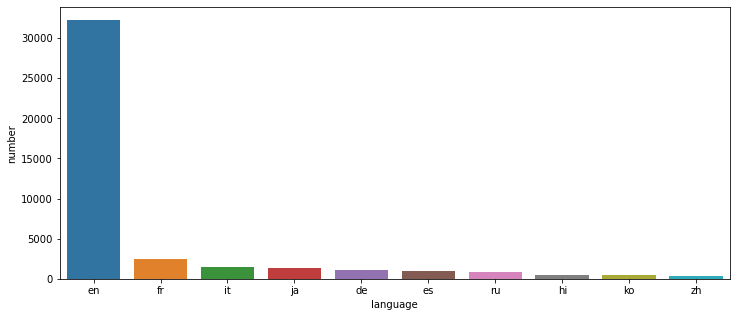

In [63]:
# plotting the graph for languages 
plt.figure(figsize=(12,5))
sns.barplot(x="language",y="number", data=df_lang.head(10))

In [64]:
# as expected the english language films are in majority and rest of the languages are far behind 

In [65]:
#################################### POPULARITY ################################################################################

In [66]:
# this fuction helps us analyse the poopularity column by removing the NaN values and coverting the strings to float
def clean_pop_col(x):
    try:
        return float(x)
    except:
        return np.nan


In [67]:
df_meta["popularity"]=df_meta["popularity"].apply(clean_pop_col).astype("float")

In [68]:
df_meta["popularity"].describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

<Figure size 720x360 with 0 Axes>

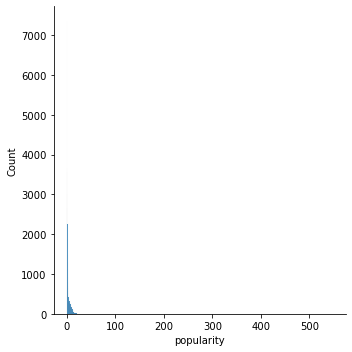

In [69]:
# we filled the NaN values using the median of the popularity values 
plt.figure(figsize=(10,5))
sns.displot(df_meta["popularity"].fillna(df_meta['popularity'].median()))

<AxesSubplot:ylabel='Frequency'>

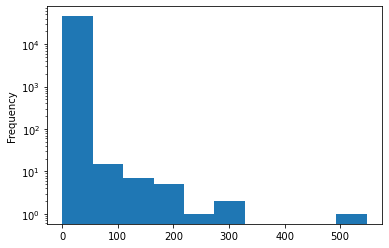

In [70]:
df_meta["popularity"].plot(logy=True,kind="hist")
# this shows that popularity is an extremely skewed quantity 

In [72]:
# getting the most popular movies by popularity score

<AxesSubplot:xlabel='title', ylabel='popularity'>

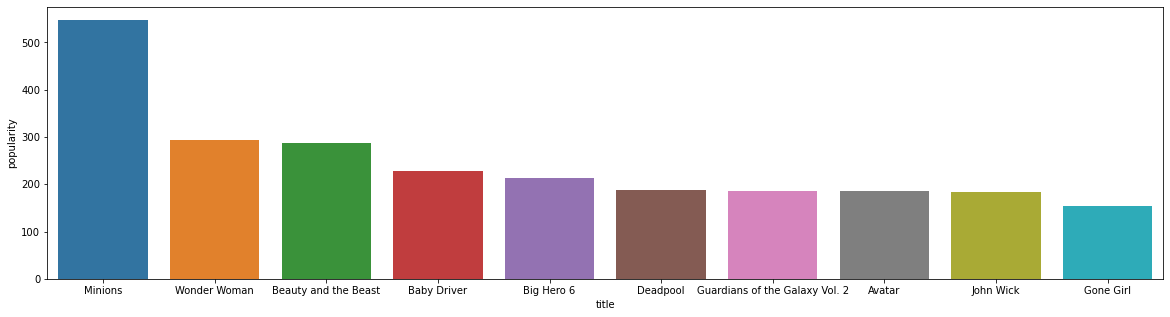

In [73]:
plt.figure(figsize=(20,5))
sns.barplot(data=df_meta[["title","popularity"]].sort_values(by="popularity",ascending=False).head(10),x="title",y="popularity")

In [74]:
# most voted movies by vote count

In [75]:
# we use the sort_values to sort the dataframe
df_meta[["vote_count","title"]].sort_values(by="vote_count",ascending=False).head(10)

,vote_count,title
15480,14075.0,Inception
12481,12269.0,The Dark Knight
14551,12114.0,Avatar
17818,12000.0,The Avengers
26564,11444.0,Deadpool
22879,11187.0,Interstellar
20051,10297.0,Django Unchained
23753,10014.0,Guardians of the Galaxy
2843,9678.0,Fight Club
18244,9634.0,The Hunger Games


<AxesSubplot:xlabel='title', ylabel='vote_count'>

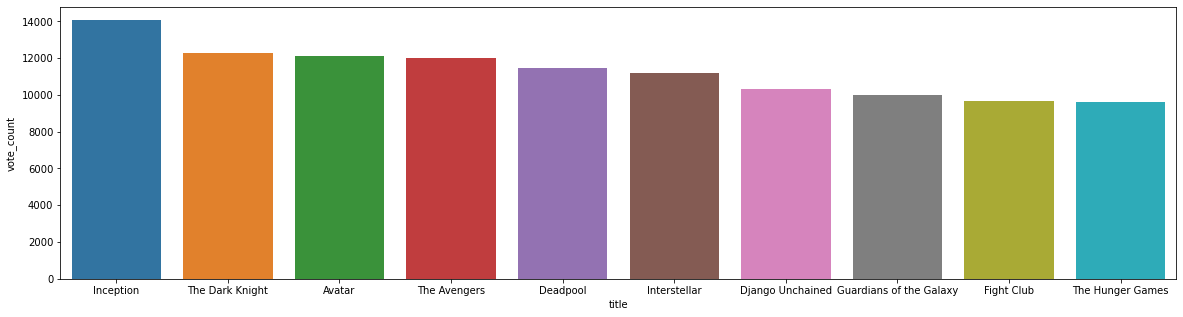

In [76]:
# plotting the graph for the same
plt.figure(figsize=(20,5))
sns.barplot(data=df_meta[["vote_count","title"]].sort_values(by="vote_count",ascending=False).head(10),x="title",y="vote_count")

In [77]:
# the ret_year function helps get the year from "release_date" column 
def ret_year(x):
    return eval(x[:4])

# we replace the NaN values
df_meta["release_date"]=df_meta["release_date"].replace(np.nan,"0000-00-00")
df_meta["year_of_release"]=df_meta["release_date"].apply(ret_year)

In [78]:
df_meta[["title","popularity","year_of_release"]].sort_values(by="popularity",ascending=False).head(10)

,title,popularity,year_of_release
30700,Minions,547.488298,2015
33356,Wonder Woman,294.337037,2017
42222,Beauty and the Beast,287.253654,2017
43644,Baby Driver,228.032744,2017
24455,Big Hero 6,213.849907,2014
26564,Deadpool,187.860492,2016
26566,Guardians of the Galaxy Vol. 2,185.330992,2017
14551,Avatar,185.070892,2009
24351,John Wick,183.870374,2014
23675,Gone Girl,154.801009,2014


In [79]:
# a data distribution plot of vote averages

In [173]:
df_meta[df_meta["vote_count"]>2000][["vote_average","title","vote_count","year_of_release"]].sort_values("vote_average",ascending=False)

,vote_average,title,vote_count,year_of_release
314,8.5,The Shawshank Redemption,8358.0,1994
834,8.5,The Godfather,6024.0,1972
2211,8.3,Life Is Beautiful,3643.0,1997
5481,8.3,Spirited Away,3968.0,2001
1152,8.3,One Flew Over the Cuckoo's Nest,3001.0,1975
...,...,...,...,...
20447,5.2,A Good Day to Die Hard,3519.0,2013
17272,5.1,Green Lantern,2551.0,2011
21018,5.0,After Earth,2579.0,2013
30556,4.9,Independence Day: Resurgence,2550.0,2016


<AxesSubplot:xlabel='vote_average', ylabel='Count'>

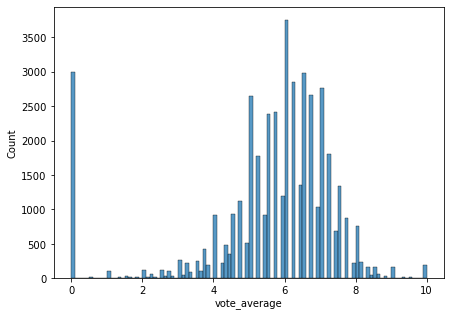

In [174]:
# we have replaced the NaN values with the median of the "vote_average" column 
plt.figure(figsize=(7,5))
sns.histplot(df_meta["vote_average"].fillna(df_meta["vote_average"].median()))

In [178]:
# also we select only those movies which have a high vote count of more that 2000
#the mean rating here is 5.6 which is quite low on a scal of 10 , this implies that the ratings are given on a very strict basis
df_meta["vote_average"].mean()

5.618207215133889

In [175]:
# similariy between vote average and popularity 

In [179]:
df_meta["vote_average"].corr(df_meta["popularity"])

0.15439944286409168

In [ ]:
# the correlation btw vote average and popularity is very low which suggests that is close to no relation 

<Figure size 720x216 with 0 Axes>

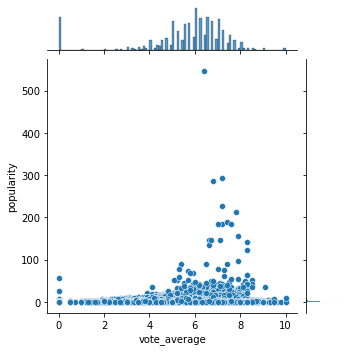

In [176]:
plt.figure(figsize=(10,3))
sns.jointplot(x="vote_average",y="popularity",data=df_meta,height=5,kind="scatter")

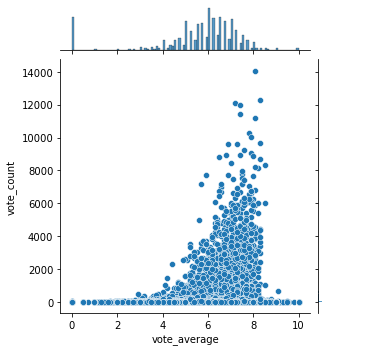

In [181]:
sns.jointplot(x="vote_average",y="vote_count",data=df_meta,height=5,kind="scatter")

In [182]:
# correlation between vote average and vote count is also very less which implies that there is no signficant relationship 
df_meta["vote_average"].corr(df_meta["vote_count"])

0.12360664415827008

In [183]:
correl=df_meta.corr()

In [86]:
# this is the correlation matrix which shows the correlation between all the colums with one another
correl

,budget,popularity,revenue,runtime,vote_average,vote_count,times_return,year_of_release
budget,1.000000,0.449645,0.744505,0.134733,0.073494,0.676642,-0.019865,0.045178
popularity,0.449645,1.000000,0.458104,0.129927,0.154399,0.559965,-0.008660,0.054163
revenue,0.744505,0.458104,1.000000,0.202615,0.149402,0.781789,-0.011329,0.079215
runtime,0.134733,0.129927,0.202615,1.000000,0.158146,0.113539,-0.013734,0.055797
vote_average,0.073494,0.154399,0.149402,0.158146,1.000000,0.123607,0.015565,0.075207
vote_count,0.676642,0.559965,0.781789,0.113539,0.123607,1.000000,-0.008656,0.037950
times_return,-0.019865,-0.008660,-0.011329,-0.013734,0.015565,-0.008656,1.000000,-0.034725
year_of_release,0.045178,0.054163,0.079215,0.055797,0.075207,0.037950,-0.034725,1.000000


<AxesSubplot:>

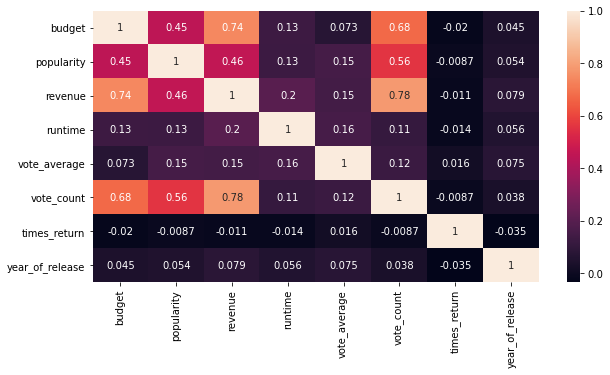

In [87]:
# heatmap
plt.figure(figsize=(10,5))
sns.heatmap(correl,annot=True,)

In [184]:
#df_meta.head(1).transpose()

In [89]:
df_meta["release_date"][0][:]

'1995-10-30'

In [90]:

# getting the movie release watch month from the dataset 

In [91]:
def extract_month(x):
    ref={1:"jan",2:"feb",3:"mar",4:"apr",5:"may",6:'jun',7:"jul",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec",0:"not_available"}
    if x=="0000-00-00":
        return "not_available"
    if x[5:7]=="01":
        return "jan"
    if x[5:7]=="02":
        return "feb"
    if x[5:7]=="03":
        return "mar"
    if x[5:7]=="04":
        return "apr"
    if x[5:7]=="05":
        return "may"
    if x[5:7]=="06":
        return "jun"
    if x[5:7]=="07":
        return "jul"
    if x[5:7]=="08":
        return "aug"
    if x[5:7]=="09":
        return "sep"
    if x[5:7]=="10":
        return "oct"
    if x[5:7]=="11":
        return "nov"
    if x[5:7]=="12":
        return "dec"


In [92]:
df_meta["month_of_release"]=df_meta["release_date"].apply(extract_month)

In [93]:
df_meta["month_of_release"]

0                  oct
1                  dec
2                  dec
3                  dec
4                  feb
             ...      
45461    not_available
45462              nov
45463              aug
45464              oct
45465              jun
Name: month_of_release, Length: 45466, dtype: object

<AxesSubplot:xlabel='month_of_release', ylabel='count'>

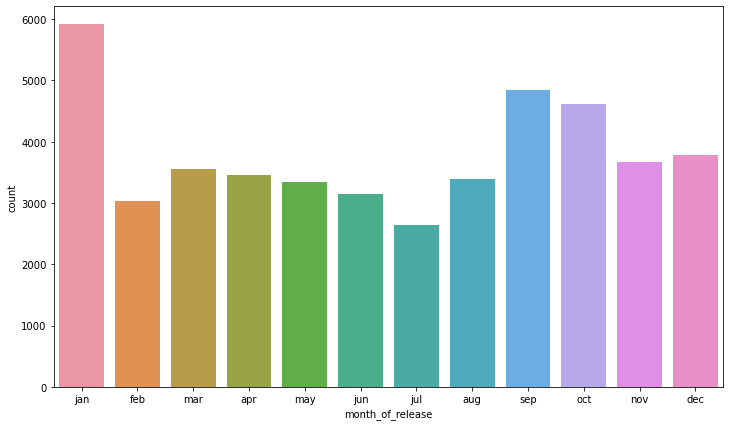

In [94]:
# plotting the number of movies in each month 
ref=["jan","feb","mar","apr","may",'jun',"jul","aug","sep","oct","nov","dec"]
plt.figure(figsize=(12,7))
sns.countplot(x=df_meta["month_of_release"],order=ref)

In [ ]:
# we see that the month january has the most number of movies 

In [95]:
# average gross revenue by month for superhit movies

In [185]:
# we consider movies that have a revenue of more that 50 million for this particular analysis
gr_month=pd.DataFrame(df_meta[df_meta["revenue"] > 50000000].groupby(by="month_of_release")["revenue"].mean())

In [186]:
gr_month["months"]=gr_month.index

In [187]:
gr_month.reset_index(inplace=True)

In [188]:
ref=["jan","feb","mar","apr","may",'jun',"jul","aug","sep","oct","nov","dec"]
gr_month

,month_of_release,revenue,months
0,apr,2.034742e+08,apr
1,aug,1.389043e+08,aug
2,dec,2.030361e+08,dec
3,feb,1.544119e+08,feb
4,jan,1.144024e+08,jan
5,jul,2.026347e+08,jul
6,jun,2.791200e+08,jun
7,mar,1.873266e+08,mar
8,may,3.127802e+08,may
9,nov,2.411273e+08,nov


In [189]:
gr_month.drop(9,inplace=True)

<AxesSubplot:xlabel='months', ylabel='revenue'>

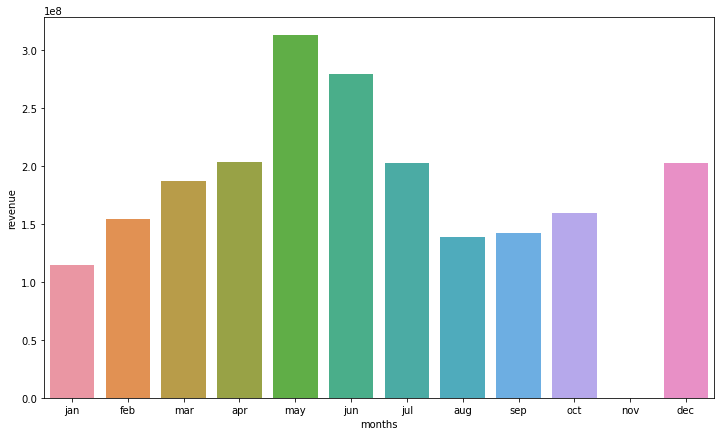

In [191]:
# plotting the graph 
plt.figure(figsize=(12,7))
sns.barplot(data=gr_month,x="months",y="revenue",order=ref)

In [ ]:
# we can see that most highest grossing movies are released in the month of may and june 

In [102]:
#number of movies released on a particular day 

In [192]:
#df_meta.head().transpose()

In [104]:
df_meta["release_date"][1234]

'1991-10-03'

In [105]:
import datetime

In [106]:
# extract_day function helps us to get the day on which a particular movie was released
day_lis=["mon","tue","wed","thu","fri","sat","sun"]
def extract_day(x):
    try:
        y,m,t=(int(i) for i in x.split(sep="-"))
        ans=datetime.date(y,m,t).weekday()
        return day_lis[ans]
    except:
        return np.nan
    
        
        
        

In [107]:
df_meta["day_of_release"]=df_meta["release_date"].apply(extract_day)

In [108]:
#df_meta.head(1).transpose()

In [109]:
day_df=pd.DataFrame(df_meta["day_of_release"].value_counts())

In [110]:
day_df["days"]=day_df.index

<AxesSubplot:xlabel='days', ylabel='day_of_release'>

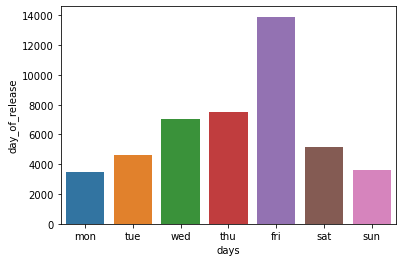

In [111]:
# with the help of the barplot we can easily see that the most of the movies were released on friday , as friday marks the 
# beginning of the weekend 
sns.barplot(data=day_df,x="days",y="day_of_release",order=day_lis)

In [112]:
# number of movires released by the year

In [113]:
year_df=pd.DataFrame(df_meta.groupby(by="year_of_release")["title"].count())

In [114]:
year_df["year"]=year_df.index

In [115]:
year_df.drop(index=[0,1,12,22],inplace=True)

<AxesSubplot:xlabel='year', ylabel='title'>

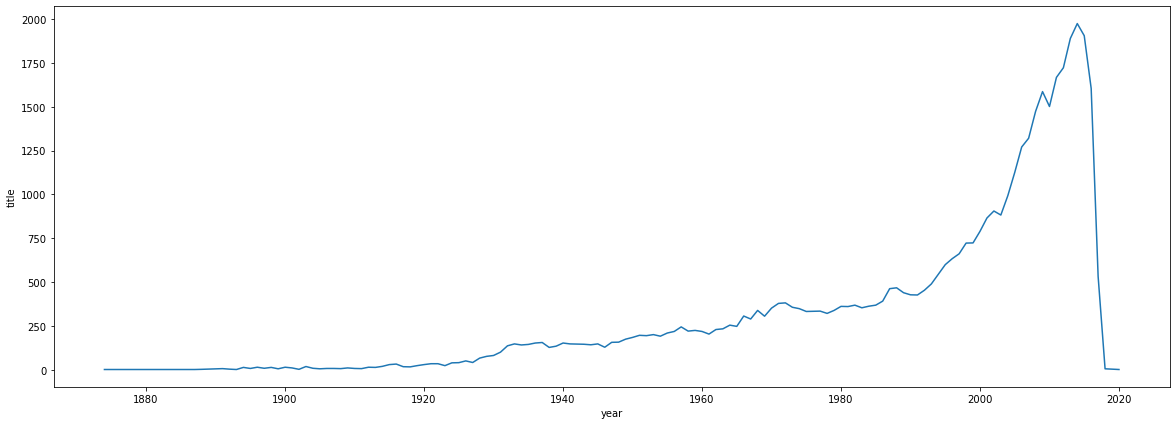

In [116]:
# after some data cleaning and after plotting the graph we can see that there was a surge
# in the number of movies released in between 2000 and 2020
plt.figure(figsize=(20,7))
sns.lineplot(data=year_df,x="year",y="title")

In [117]:
df_meta['year_of_release']

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
45461       0
45462    2011
45463    2003
45464    1917
45465    2017
Name: year_of_release, Length: 45466, dtype: int64

In [118]:
# top 10 oldest movies in the database 

In [119]:
oldmov_df=(df_meta[df_meta[["year_of_release","title"]]!=(np.nan)]).sort_values(by="year_of_release",ascending=True)[["title","year_of_release"]]

In [120]:
# these are the to 10 oldest movies
oldmov_df[oldmov_df["year_of_release"]>1800].sort_values(by="year_of_release").head(10)

,title,year_of_release
34940,Passage of Venus,1874
34937,Sallie Gardner at a Gallop,1878
41602,Buffalo Running,1883
34933,Man Walking Around a Corner,1887
34934,Accordion Player,1888
34938,Traffic Crossing Leeds Bridge,1888
34935,"Monkeyshines, No. 1",1890
39954,"Monkeyshines, No. 3",1890
41194,Mosquinha,1890
34939,London's Trafalgar Square,1890


In [193]:
#oldmov_df[(oldmov_df["title"]!=np.nan) & (oldmov_df["year_of_release"]!=0)][["year_of_release","title"]]

In [ ]:
# to 10 latest movies 

In [198]:
oldmov_df[oldmov_df["year_of_release"]>1800].sort_values(by="year_of_release",ascending=False).head(10) 

,title,year_of_release
26559,Avatar 2,2020
38130,Mary Shelley,2018
33359,Iron Sky: The Coming Race,2018
38885,The Other Side of the Wind,2018
30402,Bad Boys for Life,2018
44535,Mobile Homes,2018
42701,Asteria,2017
42654,Britney Ever After,2017
42684,"Nick Cannon: Stand Up, Don't Shoot",2017
42687,Fair Haven,2017


In [122]:
# spoken language analysis 

In [123]:
# the analysis_spokenlanguage gives us the count of the number of languages in which the movie is avaliable
df_meta["analysis_spokenlanguage"]=df_meta["spoken_languages"].fillna("[]").apply(ast.literal_eval)

In [124]:
df_meta["analysis_spokenlanguage"]=df_meta["analysis_spokenlanguage"].apply(lambda x: len(x) if isinstance(x,list) else np.nan)

In [125]:
df_meta[["analysis_spokenlanguage","title"]].sort_values(by="analysis_spokenlanguage",ascending=False).head(10)

,analysis_spokenlanguage,title
22235,19,Visions of Europe
35288,13,The Testaments
14093,12,To Each His Own Cinema
8789,10,The Adventures of Picasso
33420,9,Human
44983,9,The Life
33043,9,Son of Saul
14416,9,2012
17158,9,Pina
10336,8,Lord of War


In [195]:
# runtime of movies 

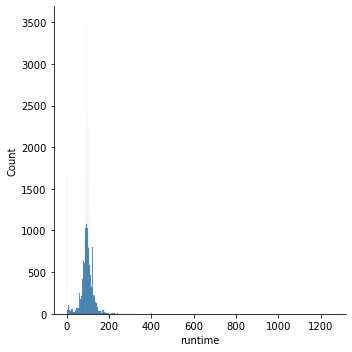

In [194]:
sns.displot(df_meta["runtime"])
# since here we can see that the runtime mainly lies between 0-300 so we cosntruct a zoomed in graph for the same 

In [128]:
df_meta[(df_meta["runtime"]>0) & (df_meta["runtime"]<300)][["title","runtime"]]

,title,runtime
0,Toy Story,81.0
1,Jumanji,104.0
2,Grumpier Old Men,101.0
3,Waiting to Exhale,127.0
4,Father of the Bride Part II,106.0
...,...,...
45460,Robin Hood,104.0
45461,Subdue,90.0
45463,Betrayal,90.0
45464,Satan Triumphant,87.0


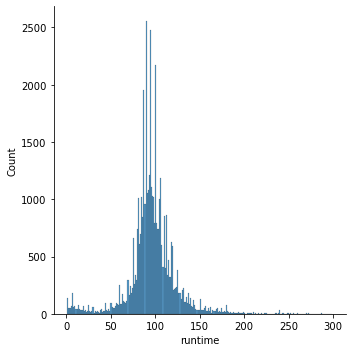

In [129]:
sns.displot(df_meta[(df_meta["runtime"]>0) & (df_meta["runtime"]<300)]["runtime"])

In [196]:
# we can see that most movies have a runtime of almost 100-120 minutes

In [ ]:
# shortest movies 

In [201]:
# these movies are 1 minute each
df_meta[(df_meta["runtime"]>0)][["title","runtime","year_of_release"]].sort_values(by="runtime",ascending=True).head(10)

,title,runtime,year_of_release
35146,La Vague,1.0,1891
36577,Champs de Mars,1.0,1900
36576,Palace of Electricity,1.0,1900
44965,"Luis Martinetti, Contortionist",1.0,1894
42357,A Gathering of Cats,1.0,2007
36575,Eiffel Tower from Trocadero Palace,1.0,1900
36574,Panorama of Eiffel Tower,1.0,1900
44714,The Infernal Caldron,1.0,1903
19244,The Kiss,1.0,1896
44646,The Vanishing Lady,1.0,1896


In [202]:
# longest movies 

In [203]:
df_meta[(df_meta["runtime"]>0)][["title","runtime","year_of_release"]].sort_values(by="runtime",ascending=False).head(10)

,title,runtime,year_of_release
24178,Centennial,1256.0,1978
40938,Baseball,1140.0,1994
19965,Jazz,1140.0,2001
13767,Berlin Alexanderplatz,931.0,1980
13953,Heimat: A Chronicle of Germany,925.0,1984
27855,The Story of Film: An Odyssey,900.0,2011
26682,Taken,877.0,2002
19158,The War,874.0,2007
34667,The Roosevelts: An Intimate History,840.0,2014
34732,Seventeen Moments in Spring,840.0,1973


In [131]:

# relationship between (runtime of the movie and the budget) & (runtime and times return)

In [132]:
df_meta["runtime"].corr(df_meta["budget"])

0.13473301803345028

In [197]:
# there is almost no relation between the runtime and the times retun of the movie
# this may not be as imp as the relation between runtime and bdget 
df_meta["runtime"].corr(df_meta["times_return"])

nan

In [ ]:
# we see that budget and runtime have some relationship between them as compared to runtime and times return 

In [207]:
# now we try to get the genres of each of the movies from the given data
df_meta["genres"]=df_meta["genres"].replace("[]",np.nan)

In [208]:
genres_df=pd.DataFrame(df_meta[["genres","budget","runtime","times_return"]])

In [209]:
genres_df.dropna(inplace=True)

In [210]:
genres_df["genres"]=genres_df["genres"].apply(ast.literal_eval)

In [211]:
# this function helps to get the generes of the movies and we make a new column to represent genres named "only_gen"
def extract_gen(x):
    l=[]
    for i in x:
        l.append(i["name"])
    return l

In [212]:
genres_df["only_gen"]=genres_df["genres"].apply(extract_gen)

In [213]:
genres_df

,genres,budget,runtime,times_return,only_gen
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000.0,81.0,12.451801,"[Animation, Comedy, Family]"
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",65000000.0,104.0,4.043035,"[Adventure, Fantasy, Family]"
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",16000000.0,127.0,5.090760,"[Comedy, Drama, Romance]"
4,"[{'id': 35, 'name': 'Comedy'}]",0.0,106.0,inf,[Comedy]
5,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",60000000.0,170.0,3.123947,"[Action, Crime, Drama, Thriller]"
...,...,...,...,...,...
45399,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",750000.0,0.0,0.000004,"[Crime, Comedy]"
45401,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",0.0,110.0,inf,"[Drama, History, Mystery]"
45409,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",800000.0,100.0,1.660765,"[Comedy, Drama]"
45412,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",2000000.0,107.0,0.634397,"[Romance, Drama]"


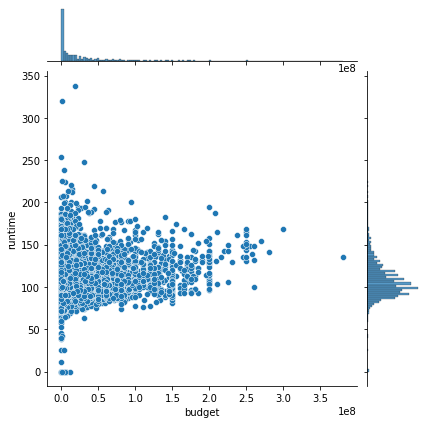

In [214]:
sns.jointplot(data=genres_df,x="budget",y="runtime",)

In [215]:
genres_df["budget"].corr(genres_df["runtime"])

0.2166002043574041

In [145]:
# longest and shortest movies

In [146]:
longshort_df=pd.DataFrame(df_meta[["runtime","title","year_of_release"]])

In [147]:
longshort_df["runtime"]=longshort_df[longshort_df["runtime"]!=0]


In [148]:
longshort_df.dropna(inplace=True)

In [205]:
longshort_df.sort_values(by="runtime",ascending=False).head(10)

,runtime,title,year_of_release
24178,1256.0,Centennial,1978
40938,1140.0,Baseball,1994
19965,1140.0,Jazz,2001
13767,931.0,Berlin Alexanderplatz,1980
13953,925.0,Heimat: A Chronicle of Germany,1984
27855,900.0,The Story of Film: An Odyssey,2011
26682,877.0,Taken,2002
19158,874.0,The War,2007
34667,840.0,The Roosevelts: An Intimate History,2014
34732,840.0,Seventeen Moments in Spring,1973


In [206]:
longshort_df.sort_values(by="runtime",ascending=True).head(10)

,runtime,title,year_of_release
35146,1.0,La Vague,1891
36577,1.0,Champs de Mars,1900
36576,1.0,Palace of Electricity,1900
44965,1.0,"Luis Martinetti, Contortionist",1894
42357,1.0,A Gathering of Cats,2007
36575,1.0,Eiffel Tower from Trocadero Palace,1900
36574,1.0,Panorama of Eiffel Tower,1900
44714,1.0,The Infernal Caldron,1903
19244,1.0,The Kiss,1896
44646,1.0,The Vanishing Lady,1896


In [151]:
# most expensive movies of all time

In [152]:
# we try to get the movies with the highest budget 
revenuenbudget_df=df_meta[["revenue","budget","title","year_of_release","times_return"]]

In [153]:
revenuenbudget_df[["title","budget","revenue","times_return"]].dropna().sort_values(by="budget",ascending=False).head(10)

,title,budget,revenue,times_return
17124,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,2.751878
11827,Pirates of the Caribbean: At World's End,300000000.0,9.610000e+08,3.203333
26558,Avengers: Age of Ultron,280000000.0,1.405404e+09,5.019299
11067,Superman Returns,270000000.0,3.910812e+08,1.448449
16130,Tangled,260000000.0,5.917949e+08,2.276134
18685,John Carter,260000000.0,2.841391e+08,1.092843
44842,Transformers: The Last Knight,260000000.0,6.049421e+08,2.326701
11780,Spider-Man 3,258000000.0,8.908716e+08,3.452991
21175,The Lone Ranger,255000000.0,8.928991e+07,0.350157
22059,The Hobbit: The Desolation of Smaug,250000000.0,9.584000e+08,3.833600


In [154]:
# relationship between budget and revenue of movies 

In [155]:
# this indicates a high pearson correlation coefficient which means there is a comparitively strong relationship
revenuenbudget_df["budget"].corr(revenuenbudget_df["revenue"])

0.7445049935262072

<Figure size 1440x504 with 0 Axes>

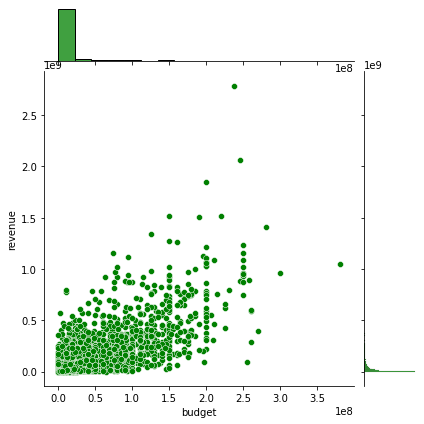

In [156]:
plt.figure(figsize=(20,7))
sns.jointplot(data=revenuenbudget_df,x="budget",y="revenue",color="green")

In [218]:
# highest grossing films

In [219]:
revenuenbudget_df[["revenue","title"]].sort_values(by="revenue",ascending=False).head(10)

,revenue,title
14551,2.787965e+09,Avatar
26555,2.068224e+09,Star Wars: The Force Awakens
1639,1.845034e+09,Titanic
17818,1.519558e+09,The Avengers
25084,1.513529e+09,Jurassic World
28830,1.506249e+09,Furious 7
26558,1.405404e+09,Avengers: Age of Ultron
17437,1.342000e+09,Harry Potter and the Deathly Hallows: Part 2
22110,1.274219e+09,Frozen
42222,1.262886e+09,Beauty and the Beast


<AxesSubplot:xlabel='year_of_release', ylabel='revenue'>

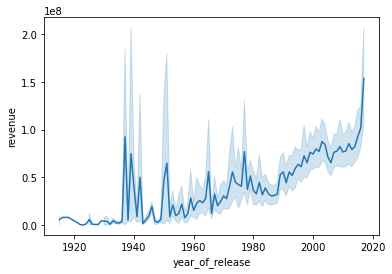

In [220]:
# from this line plot we can see that the maximum gross has steadily reason over the years 
sns.lineplot(data=revenuenbudget_df[revenuenbudget_df["year_of_release"]>1900],x="year_of_release",y="revenue")

In [160]:
# most successful movies

In [161]:
# for this analysis we consider a minimum reasonable budget of the movie (1 million) so that we can avoid vague results
revenuenbudget_df[revenuenbudget_df["budget"]>(10**6)].dropna().sort_values(by="times_return",ascending=False).head(10)

,revenue,budget,title,year_of_release,times_return
1003,572000000.0,3000000.0,Alice in Wonderland,1951,190.666667
587,184925486.0,1488423.0,Snow White and the Seven Dwarfs,1937,124.242561
893,400176459.0,4000000.0,Gone with the Wind,1939,100.044115
21344,208000000.0,2200000.0,Lost in Thailand,2012,94.545455
2542,112892319.0,1200000.0,The Rocky Horror Picture Show,1975,94.076932
993,263591415.0,2900000.0,Cinderella,1950,90.893591
8230,103911669.0,1200000.0,Saw,2004,86.593058
1065,792965326.0,10500000.0,E.T. the Extra-Terrestrial,1982,75.520507
5165,368744044.0,5000000.0,My Big Fat Greek Wedding,2002,73.748809
1563,257850122.0,3500000.0,The Full Monty,1997,73.671463


In [162]:
# genres analysis

In [163]:
# counting how many different genres are there in or dataset

In [221]:
genres_df2=pd.DataFrame(df_meta[["year_of_release","title","genres"]])

In [222]:
genres_df2["genres_list_only"]=genres_df2["genres"].dropna().apply(ast.literal_eval)

In [223]:
genres_df2

,year_of_release,title,genres,genres_list_only
0,1995,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,1995,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,1995,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,1995,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,1995,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]","[{'id': 35, 'name': 'Comedy'}]"
...,...,...,...,...
45461,0,Subdue,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...","[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n..."
45462,2011,Century of Birthing,"[{'id': 18, 'name': 'Drama'}]","[{'id': 18, 'name': 'Drama'}]"
45463,2003,Betrayal,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...","[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam..."
45464,1917,Satan Triumphant,NaN,NaN


In [224]:
# we here take out the number of movies of each genres using the below method
unique_gen ={}

for i in genres_df2["genres_list_only"]:
    if i==np.nan:
        pass
    elif isinstance(i,list)==False:
        pass
    else:
        for x in i:
            if x["name"] in unique_gen:
                unique_gen[x["name"]]=unique_gen[x["name"]]+1
            else:
                unique_gen[x["name"]]=1
print(unique_gen)

{'Animation': 1935, 'Comedy': 13182, 'Family': 2770, 'Adventure': 3496, 'Fantasy': 2313, 'Romance': 6735, 'Drama': 20265, 'Action': 6596, 'Crime': 4307, 'Thriller': 7624, 'Horror': 4673, 'History': 1398, 'Science Fiction': 3049, 'Mystery': 2467, 'War': 1323, 'Foreign': 1622, 'Music': 1598, 'Documentary': 3932, 'Western': 1042, 'TV Movie': 767, 'Carousel Productions': 1, 'Vision View Entertainment': 1, 'Telescene Film Group Productions': 1, 'Aniplex': 1, 'GoHands': 1, 'BROSTA TV': 1, 'Mardock Scramble Production Committee': 1, 'Sentai Filmworks': 1, 'Odyssey Media': 1, 'Pulser Productions': 1, 'Rogue State': 1, 'The Cartel': 1}


In [225]:
(unique_gen)

{'Animation': 1935,
 'Comedy': 13182,
 'Family': 2770,
 'Adventure': 3496,
 'Fantasy': 2313,
 'Romance': 6735,
 'Drama': 20265,
 'Action': 6596,
 'Crime': 4307,
 'Thriller': 7624,
 'Horror': 4673,
 'History': 1398,
 'Science Fiction': 3049,
 'Mystery': 2467,
 'War': 1323,
 'Foreign': 1622,
 'Music': 1598,
 'Documentary': 3932,
 'Western': 1042,
 'TV Movie': 767,
 'Carousel Productions': 1,
 'Vision View Entertainment': 1,
 'Telescene Film Group Productions': 1,
 'Aniplex': 1,
 'GoHands': 1,
 'BROSTA TV': 1,
 'Mardock Scramble Production Committee': 1,
 'Sentai Filmworks': 1,
 'Odyssey Media': 1,
 'Pulser Productions': 1,
 'Rogue State': 1,
 'The Cartel': 1}

In [226]:
gen_df3=pd.DataFrame(list(unique_gen.items()))

In [227]:
gen_df3.columns=["genres","count"]

In [230]:
gen_df3.sort_values(by="count",ascending=False).head(10)

,genres,count
6,Drama,20265
1,Comedy,13182
9,Thriller,7624
5,Romance,6735
7,Action,6596
10,Horror,4673
8,Crime,4307
17,Documentary,3932
3,Adventure,3496
12,Science Fiction,3049


<AxesSubplot:xlabel='genres', ylabel='count'>

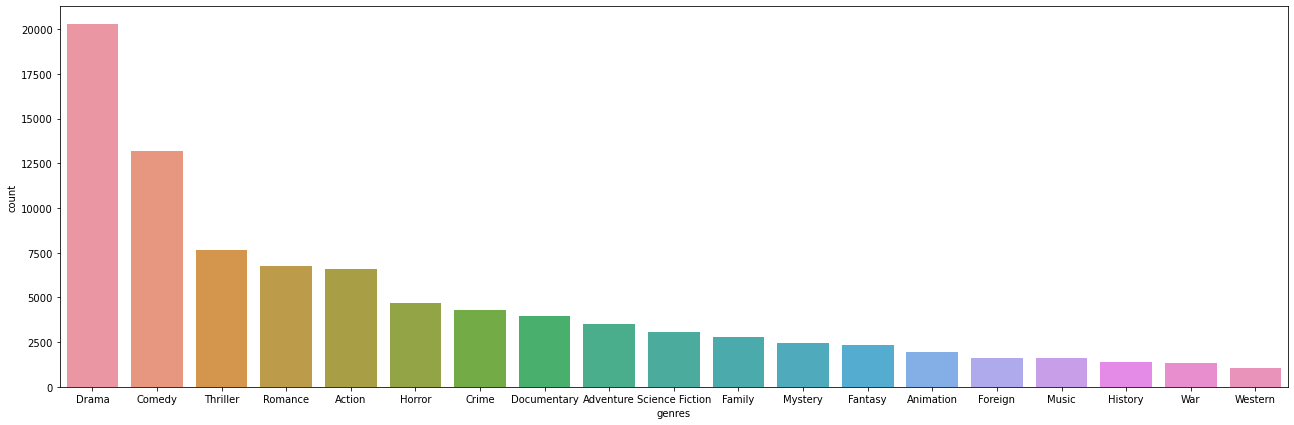

In [229]:
# plotting the chart of movies according to the genres of the movies
plt.figure(figsize=(22,7))
sns.barplot(data=gen_df3.sort_values(by="count",ascending=False).head(19),x="genres",y="count")